In [165]:
import pandas as pd
import numpy as np

In [166]:
df = pd.read_csv('C:/Users/User 1/Desktop/Ai_Ml_QB/pandas/17_06_18_06/car-sales-extended-missing-data.csv')
df

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [167]:
print(df.info())
# print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB
None


In [168]:
df.rename(columns={'Odometer (KM)': 'Odometer'}, inplace=True)
df

,Make,Colour,Odometer,Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [169]:
print(pd.isnull(df.Make).sum())
print(pd.isnull(df.Colour).sum())
print(pd.isnull(df.Odometer).sum())
print(pd.isnull(df.Doors).sum())
print(pd.isnull(df.Price).sum())

49
50
50
50
50


In [170]:
print(pd.notnull(df["Make"]).sum())
print(pd.notnull(df["Colour"]).sum())
print(pd.notnull(df["Odometer"]).sum())
print(pd.notnull(df["Doors"]).sum())
print(pd.notnull(df["Price"]).sum())

951
950
950
950
950


In [171]:
# len(df)
df.shape[0]

1000

Filling Missing Values in Pandas

In [172]:
#Using fillna()

# df.fillna(0, inplace=True)
# df.fillna(method='ffill') #df.ffill()
# df.fillna(method='bfill') #df.bdill()
df.fillna('whyyyyyyy', limit=2,inplace=True) 
# print(df.to_string())

C:\Users\User 1\AppData\Local\Temp\ipykernel_11464\3758177545.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'whyyyyyyy' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('whyyyyyyy', limit=2,inplace=True)


In [173]:
#using replace()

# df.replace(to_replace=np.nan, value=df["Price"].mean(), inplace=True)
# print(df.to_string())

interpolate() method in pandas is used to fill in missing values (NaN) using interpolation—which means estimating values based on other data in the same column.

By default, it uses linear interpolation along the index (meaning, it assumes values change in a straight line between known points), but you can customize how it works.

In [174]:
# using interpolate()
import pandas as pd
import numpy as np

# Create a sample DataFrame
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 10, np.nan, 40, 50]
})

print("Original DataFrame:")
print(df)

# 1. Linear interpolation (default)
linear_interp = df.interpolate()
print("\nLinear Interpolation:")
print(linear_interp)

# 2. Polynomial interpolation (order 2)
poly_interp = df.interpolate(method='polynomial', order=2)
print("\nPolynomial Interpolation (order=2):")
print(poly_interp)

# 3. Spline interpolation (order 2)
spline_interp = df.interpolate(method='spline', order=2)
print("\nSpline Interpolation (order=2):")
print(spline_interp)

# 4. Limit direction: forward
forward_limit = df.interpolate(limit_direction='forward')
print("\nForward Fill Interpolation:")
print(forward_limit)

# 5. Limit direction: backward
backward_limit = df.interpolate(limit_direction='backward')
print("\nBackward Fill Interpolation:")
print(backward_limit)

# 6. Interpolate along rows instead of columns
row_wise = df.interpolate(axis=1)
print("\nRow-wise Interpolation (axis=1):")
print(row_wise)

# 7. Interpolation with limit (only 1 NaN filled consecutively)
limited = df.interpolate(limit=1)
print("\nInterpolation with limit=1:")
print(limited)


Original DataFrame:
     A     B
0  1.0   NaN
1  2.0  10.0
2  NaN   NaN
3  4.0  40.0
4  5.0  50.0

Linear Interpolation:
     A     B
0  1.0   NaN
1  2.0  10.0
2  3.0  25.0
3  4.0  40.0
4  5.0  50.0

Polynomial Interpolation (order=2):
     A          B
0  1.0        NaN
1  2.0  10.000000
2  3.0  26.666667
3  4.0  40.000000
4  5.0  50.000000

Spline Interpolation (order=2):
     A          B
0  1.0        NaN
1  2.0  10.000000
2  3.0  26.666667
3  4.0  40.000000
4  5.0  50.000000

Forward Fill Interpolation:
     A     B
0  1.0   NaN
1  2.0  10.0
2  3.0  25.0
3  4.0  40.0
4  5.0  50.0

Backward Fill Interpolation:
     A     B
0  1.0  10.0
1  2.0  10.0
2  3.0  25.0
3  4.0  40.0
4  5.0  50.0

Row-wise Interpolation (axis=1):
     A     B
0  1.0   1.0
1  2.0  10.0
2  NaN   NaN
3  4.0  40.0
4  5.0  50.0

Interpolation with limit=1:
     A     B
0  1.0   NaN
1  2.0  10.0
2  3.0  25.0
3  4.0  40.0
4  5.0  50.0


Original DataFrame:
   x     y
0  0   2.0
1  1   NaN
2  2   NaN
3  3   8.0
4  4   NaN
5  5  18.0
6  6  20.0

Polynomial Interpolation (order=2):
   x          y
0  0   2.000000
1  1   2.363636
2  2   4.363636
3  3   8.000000
4  4  13.272727
5  5  18.000000
6  6  20.000000


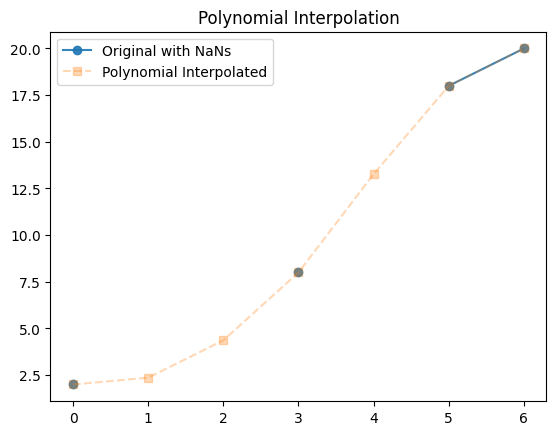

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data
df = pd.DataFrame({
    'x': range(7),
    'y': [2, np.nan, np.nan, 8, np.nan, 18, 20]
})

print("Original DataFrame:")
print(df)

# Apply polynomial interpolation of order 2
df_poly = df.copy()
df_poly['y'] = df_poly['y'].interpolate(method='polynomial', order=2)

print("\nPolynomial Interpolation (order=2):")
print(df_poly)

# Optional plot
plt.plot(df['x'], df['y'], 'o-', alpha = 0.9,label='Original with NaNs')
plt.plot(df_poly['x'], df_poly['y'], 's--', alpha=0.3,label='Polynomial Interpolated')
plt.legend()
plt.title("Polynomial Interpolation")
plt.show()


### Dropping Missing Values in Pandas

Dropping Rows with All Null Values

In [176]:
dict = {'First Score': [100, np.nan, np.nan, 95],
        'Second Score': [30, np.nan, 45, 56],
        'Third Score': [52, np.nan, 80, 98],
        'Fourth Score': [np.nan, np.nan, np.nan, 65]}
df = pd.DataFrame(dict)
display(df)
df.dropna(how='all')

,First Score,Second Score,Third Score,Fourth Score
0,100.0,30.0,52.0,NaN
1,NaN,NaN,NaN,NaN
2,NaN,45.0,80.0,NaN
3,95.0,56.0,98.0,65.0


,First Score,Second Score,Third Score,Fourth Score
0,100.0,30.0,52.0,NaN
2,NaN,45.0,80.0,NaN
3,95.0,56.0,98.0,65.0


In [177]:
df.loc[3, "Fourth Score"] = np.nan

In [178]:
df

,First Score,Second Score,Third Score,Fourth Score
0,100.0,30.0,52.0,NaN
1,NaN,NaN,NaN,NaN
2,NaN,45.0,80.0,NaN
3,95.0,56.0,98.0,NaN


In [179]:
df = df.dropna(how='all', axis=1)
df

,First Score,Second Score,Third Score
0,100.0,30.0,52.0
1,NaN,NaN,NaN
2,NaN,45.0,80.0
3,95.0,56.0,98.0


In [180]:
df1 = df.dropna()
display(df1)

,First Score,Second Score,Third Score
0,100.0,30.0,52.0
3,95.0,56.0,98.0


In [183]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'A': [100, np.nan, np.nan, 95],
    'B': [30, np.nan, 45, 56],
    'C': [52, np.nan, 80, 98],
    'D': [np.nan, np.nan, np.nan, 65]
})
print("Original:\n", df)

print("\nDrop rows with at least 1 NaN:\n",df.dropna())

print("\nDrop rows where all values are NaN:\n",df.dropna(how='all'))

print("\nDrop columns with at least 1 NaN:\n",df.dropna(axis=1))

Original:
        A     B     C     D
0  100.0  30.0  52.0   NaN
1    NaN   NaN   NaN   NaN
2    NaN  45.0  80.0   NaN
3   95.0  56.0  98.0  65.0

Drop rows with at least 1 NaN:
       A     B     C     D
3  95.0  56.0  98.0  65.0

Drop rows where all values are NaN:
        A     B     C     D
0  100.0  30.0  52.0   NaN
2    NaN  45.0  80.0   NaN
3   95.0  56.0  98.0  65.0

Drop columns with at least 1 NaN:
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]


In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'Customer': ['Alice', 'Bob', 'Charlie', 'David'],
    'Email': ['alice@example.com', np.nan, 'charlie@example.com', np.nan],
    'Phone': [np.nan, '555-1234', '555-9876', np.nan]
})

print("Original DataFrame:")
print(df)

mask = df[['Email', 'Phone']].isna().all(axis=1)

print("\nCustomers with no contact info:")
print(df[mask])

df.loc[df['Email'].isna(), 'Email'] = 'missing@example.com'

print("\nUpdated DataFrame with missing emails filled:")
print(df)


Original DataFrame:
  Customer                Email     Phone
0    Alice    alice@example.com       NaN
1      Bob                  NaN  555-1234
2  Charlie  charlie@example.com  555-9876
3    David                  NaN       NaN

Customers with no contact info:
  Customer Email Phone
3    David   NaN   NaN

Updated DataFrame with missing emails filled:
  Customer                Email     Phone
0    Alice    alice@example.com       NaN
1      Bob  missing@example.com  555-1234
2  Charlie  charlie@example.com  555-9876
3    David  missing@example.com       NaN
